In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_csv("dataset/avocado.csv")

In [90]:
from pmdarima.arima.utils import ndiffs

X = data.groupby('Date')['AveragePrice'].mean()

adftest = ndiffs(X, test='adf')
kpsstest = ndiffs(X, test='kpss')
pptest = ndiffs(X, test='pp')
print("ADF Test =", adftest)  
print("KPSS Test =", kpsstest)  
print("PP Test =", pptest)  


ADF Test = 1
KPSS Test = 1
PP Test = 1


                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 3, 1)   Log Likelihood                 205.445
Date:                Wed, 14 Dec 2022   AIC                           -404.890
Time:                        18:17:59   BIC                           -395.554
Sample:                    01-04-2015   HQIC                          -401.100
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4456      0.060     -7.465      0.000      -0.563      -0.329
ma.L1         -0.9935      0.194     -5.115      0.000      -1.374      -0.613
sigma2         0.0048      0.001      4.408      0.0

/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


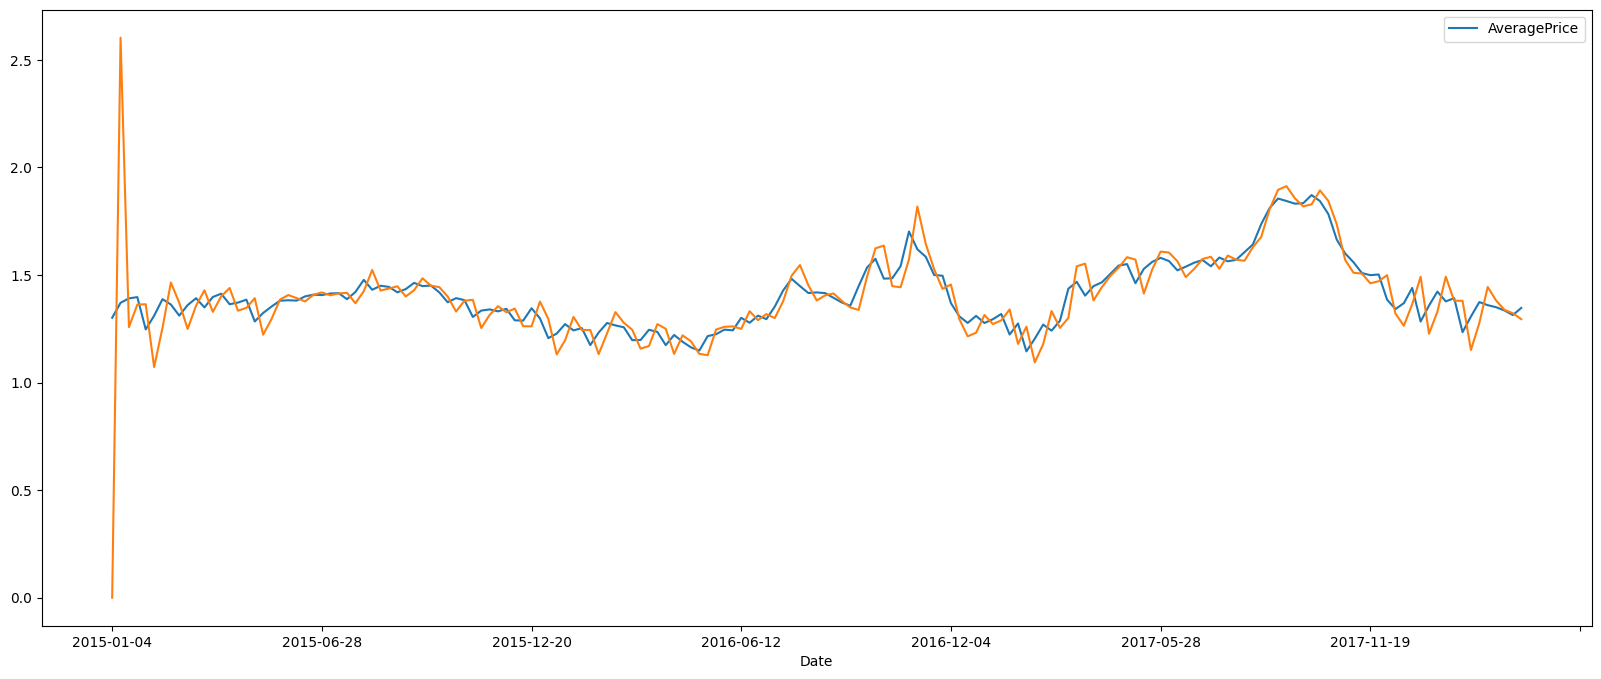

In [91]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data.groupby('Date')['AveragePrice'].mean(), order=(1, 3, 1))
modelFit = model.fit()
print(modelFit.summary())
ts = data.groupby('Date')['AveragePrice'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ts.set_index('Date').plot(ax=ax)
val = modelFit.predict()
plt.plot(ts['Date'], val)